In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In this notebook I practice curve fitting by means of polynomial regression. I will apply a least squares approach, similar to the one I applied for multiple linear regression in notebook 3. 

## Generate the data

I am generate a synthetic dataset by using a cubic curve.

In [2]:
np.random.seed(0)

In [3]:
x = np.array(range(1,11)).reshape(10, 1)
X = np.concatenate((np.ones((10, 1)), x, x ** 2, x ** 3), axis = 1)
X

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

I am adding some random noise after calculating the value of the dependent variable. The magnitude of the random noise is high, so it can be clearly visible on the plots. Unfortunately, this means that the predicted coefficients of the model will be quite different to the ones used to calculate the value of the dependent variable. 

In [4]:
beta = np.array([5000, 2.3, 1.3, 10]).reshape(1, 4)
y = np.dot(beta, X.T).T
# Adding noise
y = y + 2000*np.random.random((10, 1))
y

array([[ 6111.22700785],
       [ 6520.17873274],
       [ 6494.12675214],
       [ 6759.76636599],
       [ 7141.30959868],
       [ 8512.38822613],
       [ 9384.97442253],
       [12005.14600156],
       [14343.325521  ],
       [15919.88303765]])

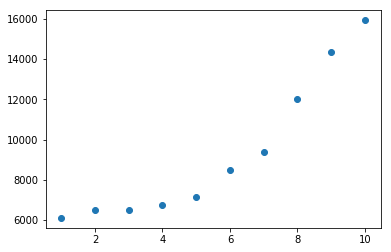

In [5]:
fig, ax = plt.subplots()
ax.scatter(x.flatten(), y.flatten())

## Fitting a linear model

Using least squares to fit a linear model for the data. The adjusted R2 value is not too bad, but the residuals plot shows a clear patter after fitting the model. 

In [6]:
X_lin = np.concatenate((np.ones((10, 1)), x), axis = 1)
B = np.dot(np.dot(np.linalg.inv(np.dot(X_lin.T, X_lin)), X_lin.T), y)

print('Fitted linear model:')
print(B)
    
residuals = y - np.dot(X_lin, B)
adj_r2 = 1 - ((y.shape[0] - 1) * (np.std(residuals) ** 2) / ((y.shape[0] - 2 - 1) * (np.std(y) ** 2)))
print('\nAdjusted R2: ' + str(adj_r2))

Fitted linear model:
[[3324.50820562]
 [1089.94988382]]

Adjusted R2: 0.8188683280495814


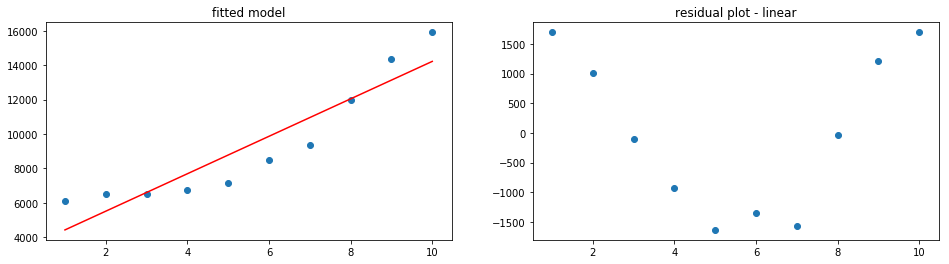

In [7]:
fig, ax = plt.subplots(1, 2)

y_pred_lin = np.dot(B.T, X_lin.T).T
ax[0].scatter(x.flatten(), y.flatten())
ax[0].plot(range(1, 11), y_pred_lin, 'red')
ax[0].set_title('fitted model')

ax[1].scatter(x.flatten(), residuals)
ax[1].set_title('residual plot - linear')

fig.set_figwidth(16)

## Fitting a polynomial model

In this case we fit a cubic model. The residuals in this case seem to be normally distributed, clearly indicating that there is no clear pattern in the residuals after fitting the polynomial model. 

In [8]:
B = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

print('Fitted polynomial model:')
print(B)
    
residuals = y - np.dot(X, B)
adj_r2 = 1 - ((y.shape[0] - 1) * (np.std(residuals) ** 2) / ((y.shape[0] - 2 - 1) * (np.std(y) ** 2)))
print('\nAdjusted R2: ' + str(adj_r2))

Fitted polynomial model:
[[ 6.82629955e+03]
 [-5.85365929e+02]
 [ 1.30488411e+02]
 [ 2.27650179e+00]]

Adjusted R2: 0.9871015246697796


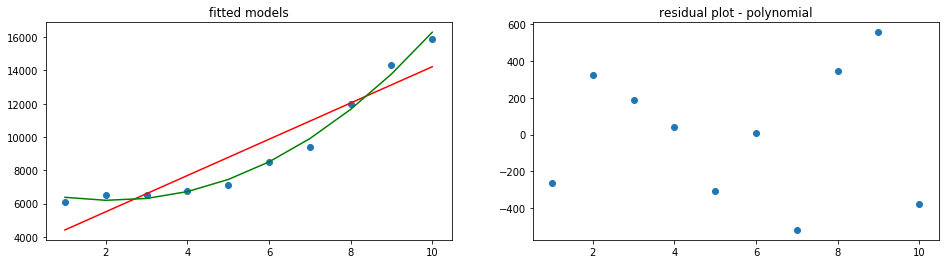

In [9]:
fig, ax = plt.subplots(1, 2)

y_pred = np.dot(B.T, X.T).T
ax[0].scatter(x.flatten(), y.flatten())
ax[0].plot(range(1, 11), y_pred_lin, 'red')
ax[0].plot(range(1, 11), y_pred,'green')
ax[0].set_title('fitted models')

ax[1].scatter(x.flatten(), residuals)
ax[1].set_title('residual plot - polynomial')

fig.set_figwidth(16)

## Model selection

As we increase the degree of the polynomial model we should expect the curve to fit better the data. However, higher level polynomial models will not be as accurate when predicting the value of the dependent variable for new unobserved observations, specially outside the range of values of the original dataset. 

In [10]:
for degree in range(2, 6):
    X = np.concatenate((np.ones((10, 1)), x), axis = 1)
    for d in range(2, degree + 1):
        X = np.concatenate((X, x ** d), axis = 1)
    B = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

    residuals = y - np.dot(X, B)
    adj_r2 = 1 - ((y.shape[0] - 1) * (np.std(residuals) ** 2) / ((y.shape[0] - 2 - 1) * (np.std(y) ** 2)))
    print('Degree ' + str(degree) + ' - adjusted R2: ' + str(adj_r2))
    
    y_pred = np.dot(B.T, X.T).T

Degree 2 - adjusted R2: 0.9869211161780138
Degree 3 - adjusted R2: 0.9871015246697796
Degree 4 - adjusted R2: 0.9957044185907065
Degree 5 - adjusted R2: 0.9966424554186546


We plot the highest degree model so we can compare the residuals plot:

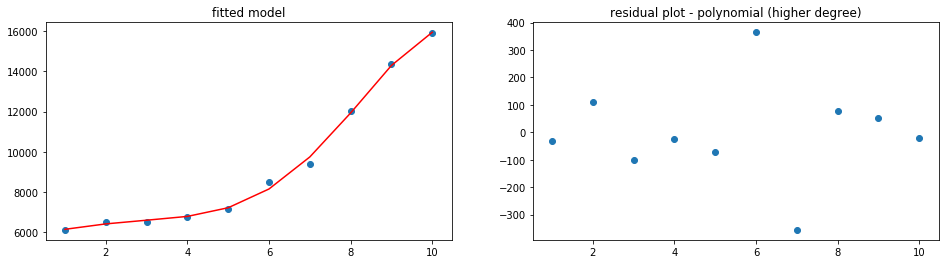

In [11]:
fig, ax = plt.subplots(1, 2)

y_pred = np.dot(B.T, X.T).T
ax[0].scatter(x.flatten(), y.flatten())
ax[0].plot(range(1, 11), y_pred,'red')
ax[0].set_title('fitted model')

ax[1].scatter(x.flatten(), residuals)
ax[1].set_title('residual plot - polynomial (higher degree)')

fig.set_figwidth(16)